In [1]:
# Feller Liar Problem – Markov Chains via Marginalization
# Authors: Anjali,Tania
# Course: Stochastic Process

import numpy as np
import matplotlib.pyplot as plt


In [2]:
#MARGINALIZATION FUNCTIONS

def compute_next_distribution(current_distribution, transition_matrix):
    """
    Compute the next state distribution in a Markov chain by marginalization.

    arguments :
        current_distribution (list or np.array): Probability distribution over states at current time.
        transition_matrix (list of lists or np.array): Matrix of transition probabilities,
            where transition_matrix[i][j] = P(next state = j | current state = i).

    returns:
        np.array: Next time step's state distribution.
    """
    num_states = len(current_distribution)
    next_distribution = np.zeros(num_states)  # Initialize next distribution to all zeros

    # For each current state, distribute its current probability over all possible next states
    for current_state in range(num_states):
        current_state_prob = current_distribution[current_state]

        # If no probability of being in this state, skip computations
        if current_state_prob == 0:
            continue

        # Update probabilities for all possible next states
        for next_state in range(num_states):
            transition_prob = transition_matrix[current_state][next_state]
            next_distribution[next_state] += current_state_prob * transition_prob

    return next_distribution

def compute_n_step_distribution(transition_matrix, initial_distribution, num_steps):
    """
    Compute the distribution of states after 'num_steps' of the Markov chain.

    arguments:
        transition_matrix (list of lists or np.array): Transition probability matrix.
        initial_distribution (list or np.array): Distribution at time step 0.
        num_steps (int): Number of steps to advance.

    returns:
        np.array: State distribution after num_steps transitions.
    """
    distribution = np.array(initial_distribution, dtype=float)

    # Iteratively apply one-step marginalization n times to get n-step distribution
    for _ in range(num_steps):
        distribution = compute_next_distribution(distribution, transition_matrix)

    return distribution

In [3]:
#2 STATE MODEL

def create_two_state_transition_matrix(p):
    """
    Returns the 2x2 transition matrix for a symmetric two-state Markov chain model.
    """
    q = 1 - p
    return [[p, q],
            [q, p]]


def compute_two_state_probabilities(initial_prob_0, transition_prob_p, num_steps):
    """
    Computes via marginalization:
    - Distribution at time `num_steps`
    - Probabilities Xn = P(start=0 | final=0) and Yn = P(start=0 | final=1)

    arguments:
        initial_prob_0 (float): Initial probability of starting in state 0.
        transition_prob_p (float): Probability of staying in the same state.
        num_steps (int): Number of steps to advance.

    returns:
        dict: Contains transition matrix, distribution at time n, joint probabilities, Xn, and Yn.
    """
    transition_matrix = create_two_state_transition_matrix(transition_prob_p)

    # Initial distribution over start states
    initial_distribution = [initial_prob_0, 1 - initial_prob_0]

    # Compute distributions at time n assuming start from each state
    dist_given_start = []
    for start_state in [0, 1]:
        start_vector = [0.0, 0.0]
        start_vector[start_state] = 1.0
        dist_after_n = compute_n_step_distribution(transition_matrix, start_vector, num_steps)
        dist_given_start.append(dist_after_n)

    # Compute joint probabilities P(start=s, final=j)
    joint_probabilities = np.zeros((2, 2))
    for s in [0, 1]:
        for j in [0, 1]:
            joint_probabilities[s, j] = initial_distribution[s] * dist_given_start[s][j]

    # Marginal over final states: P(final=j)
    marginal_final = joint_probabilities.sum(axis=0)

    # Using Bayes Theorem,
    xn = joint_probabilities[0, 0] / marginal_final[0]  # P(start=0 | final=0)
    yn = joint_probabilities[0, 1] / marginal_final[1]  # P(start=0 | final=1)

    return {
        'transition_matrix': transition_matrix,
        'distribution_at_n': marginal_final,
        'joint_probabilities': joint_probabilities,
        'xn': xn,
        'yn': yn
    }

In [4]:
#EXAMPLE

results=compute_two_state_probabilities(0.6,0.7,2)
print("Transition matrix P:")
print(np.array(results['transition_matrix']))

print("\nDistribution at time n=2:")
print(results['distribution_at_n'])

print("\nJoint probabilities (start, final):")
print(results['joint_probabilities'])

print(f"\nX2 = P(start=0 | final=0) = {results['xn']:.3f}")
print(f"Y2 = P(start=0 | final=1) = {results['yn']:.3f}")

Transition matrix P:
[[0.7 0.3]
 [0.3 0.7]]

Distribution at time n=2:
[0.516 0.484]

Joint probabilities (start, final):
[[0.348 0.252]
 [0.168 0.232]]

X2 = P(start=0 | final=0) = 0.674
Y2 = P(start=0 | final=1) = 0.521


In [5]:
#PREFERENTIAL 2 STATE MODEL

def create_preferential_two_state_tpm(prob_stay_0, prob_stay_1):
    """
    Returns the 2x2 transition matrix for an asymmetric two-state Markov chain model.
    arguments:
        prob_stay_0 (float): Probability to stay in state 0 (P(0->0)).
        prob_stay_1 (float): Probability to stay in state 1 (P(1->1)).
    returns:
        list: 2x2 list representing transition matrix.
    """
    return [
        [prob_stay_0, 1 - prob_stay_0],    # transitions from state 0
        [1 - prob_stay_1, prob_stay_1]     # transitions from state 1
    ]

#Example
preferential_tpm = create_preferential_two_state_tpm(0.8,0.5)

# Print the transition matrix
print("Preferential (asymmetric) 2-state transition matrix:")
print(np.array(preferential_tpm))

Preferential (asymmetric) 2-state transition matrix:
[[0.8 0.2]
 [0.5 0.5]]


In [6]:
#N-STATE GENERALIZATION

def create_n_state_uniform_error_tpm(num_states, prob_stay):
    """
    Returns the NxN transition matrix for a uniform error N-state Markov chain model.

    arguments:
        num_states (int): Number of states N.
        prob_stay (float): Probability to stay in the same state (P(i -> i)).

    returns:
        list: NxN transition matrix as a list of lists.
    """
    prob_switch = 1 - prob_stay
    return [
        [prob_stay if i == j else prob_switch / (num_states - 1) for j in range(num_states)]
        for i in range(num_states)
    ]

#Example
create_n_state_uniform_error_tpm(5, 0.5)

[[0.5, 0.125, 0.125, 0.125, 0.125],
 [0.125, 0.5, 0.125, 0.125, 0.125],
 [0.125, 0.125, 0.5, 0.125, 0.125],
 [0.125, 0.125, 0.125, 0.5, 0.125],
 [0.125, 0.125, 0.125, 0.125, 0.5]]

In [13]:
#STATIONARY DISTRIBUTION

def compute_stationary_distribution_via_iteration(transition_matrix, tolerance=1e-12, max_iterations=100000):
    """
    Iteratively computes the stationary distribution by repeated marginalization until convergence.

    arguments:
        transition_matrix (list of lists or np.array): Transition probability matrix for the Markov chain.
        tolerance (float): Convergence threshold for the distribution change.
        max_iterations (int): Maximum number of iterations to attempt.

    returns:
        np.array: Approximated stationary distribution vector.
    """
    num_states = len(transition_matrix)
    # Start with uniform distribution
    current_distribution = np.full(num_states, 1.0 / num_states)
    for _ in range(max_iterations):
        next_distribution = compute_next_distribution(current_distribution, transition_matrix)
        if np.sum(np.abs(next_distribution - current_distribution)) < tolerance:
            return next_distribution
        current_distribution = next_distribution
    return current_distribution

In [14]:
#MONTE CARLO SIMULATION

def simulate_markov_chain_path(transition_matrix, initial_state, num_steps, rng):
    """
    Simulate a single Markov chain path.

    arguments:
        transition_matrix (list of lists or np.array): Markov transition matrix.
        initial_state (int): Starting state index.
        num_steps (int): Number of steps to simulate.
        rng (np.random.Generator, optional): Random number generator.

    returns:
        np.array: Sequence of visited states of length num_steps + 1.
    """
    if rng is None:
        rng = np.random.default_rng()
    num_states = len(transition_matrix)
    path = np.empty(num_steps + 1, dtype=int)
    path[0] = initial_state
    for t in range(1, num_steps + 1):
        current_state = path[t - 1]
        path[t] = rng.choice(range(num_states), p=transition_matrix[current_state])
    return path

def simulate_many_markov_chains(transition_matrix, initial_distribution, num_steps, num_trials=10000):
    """
   Run many trials to empirically estimate n-step transition probabilities.

    arguments:
        transition_matrix (list of lists or np.array): Transition matrix.
        initial_distribution (list or np.array): Probability distribution across start states.
        num_steps (int): Steps per trial.
        num_trials (int): Number of simulated trials.

    returns:
        np.array: Estimated n-step transition probability table, shape (num_states, num_states).
    """
    rng = np.random.default_rng()
    num_states = len(transition_matrix)
    pair_counts = np.zeros((num_states, num_states))
    for _ in range(num_trials):
        start_state = rng.choice(range(num_states), p=initial_distribution)
        end_state = simulate_markov_chain_path(transition_matrix, start_state, num_steps, rng)[-1]
        pair_counts[start_state, end_state] += 1
    conditional_probabilities = pair_counts / pair_counts.sum(axis=1, keepdims=True)
    return conditional_probabilities

# Example
P = [
    [0.7, 0.2, 0.1],
    [0.1, 0.8, 0.1],
    [0.3, 0.3, 0.4]
]

initial_dist = [0.5, 0.3, 0.2]
n_steps = 5
n_trials = 100000

# Run the simulation
estimated_transition = simulate_many_markov_chains(P, initial_dist, n_steps, n_trials)

print("Estimated 5-step transition matrix:")
print(np.round(estimated_transition, 3))

Estimated 5-step transition matrix:
[[0.365 0.491 0.144]
 [0.288 0.568 0.144]
 [0.337 0.521 0.142]]


In [15]:
#2 STATE EXAMPLE

# Parameters
a, p, n = 0.6, 0.75, 5
res = compute_two_state_probabilities(a, p, n)

print("Transition Matrix P:\n", np.array(res['transition_matrix']))
print(f"\nDistribution at time {n}: {res['distribution_at_n']}")
print("Xn =", res['xn'], "  Yn =", res['yn'])
print("\nJoint start→final:\n", res['joint_probabilities'])


# Verify by simulation
empirical = simulate_many_markov_chains(res['transition_matrix'], [a, 1 - a], n, num_trials=50000)
print("\nEmpirical P^n ≈\n", empirical)

Transition Matrix P:
 [[0.75 0.25]
 [0.25 0.75]]

Distribution at time 5: [0.503125 0.496875]
Xn = 0.6149068322981366   Yn = 0.5849056603773585

Joint start→final:
 [[0.309375 0.290625]
 [0.19375  0.20625 ]]

Empirical P^n ≈
 [[0.51086667 0.48913333]
 [0.48455    0.51545   ]]


Stationary distribution (marginal iteration): [0.5 0.5]


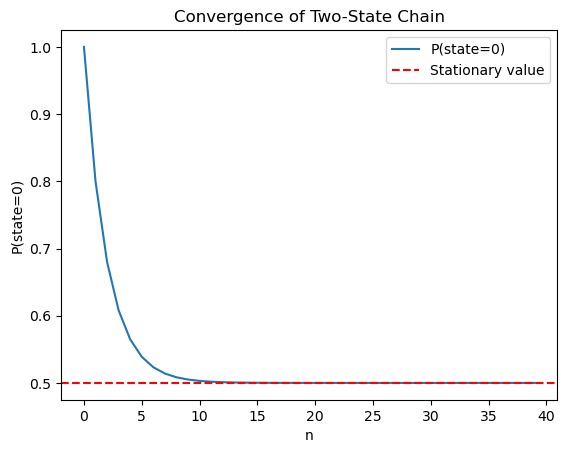

In [16]:
#CONVERGENCE AND STATIONARY DISTRIBUTION

P = create_two_state_transition_matrix(0.8)
pi = compute_stationary_distribution_via_iteration(P)
print("Stationary distribution (marginal iteration):", pi)

# Plot convergence of marginal distribution
start_dist = [1.0, 0.0]
dists = [compute_n_step_distribution(P, start_dist, i)[0] for i in range(40)]

plt.plot(dists, label='P(state=0)')
plt.axhline(pi[0], color='red', linestyle='--', label='Stationary value')
plt.xlabel('n')
plt.ylabel('P(state=0)')
plt.title('Convergence of Two-State Chain')
plt.legend()
plt.show()

In [18]:
#PREFENTIAL MODEL EXAMPLE

def preferential_model_demo(p_stay_state0: float, p_stay_state1: float, start_distribution: list, max_steps: int):
    """
    Demonstrates a preferential two-state Markov chain model with given parameters.

    arguments:
        p_stay_state0 (float): Probability to stay in state 0.
        p_stay_state1 (float): Probability to stay in state 1.
        start_distribution (list of two floats): Initial distribution over states.
        max_steps (int): Number of steps to compute distributions for.

    returns:
        Prints transition matrix, stationary distribution,
        and distributions at each step up to max_steps.
    """
    P_pref = create_preferential_two_state_tpm(p_stay_state0, p_stay_state1)
    pi_pref = compute_stationary_distribution_via_iteration(P_pref)
    print("Preferential transition matrix:\n", np.array(P_pref))
    print("Stationary distribution:", pi_pref)

    # Track evolution from state 0
    start = [1.0, 0.0]
    for n in range(6):
      dist = compute_n_step_distribution(P_pref, start, n)
      print(f"n={n}, dist={dist}")

# Example
preferential_model_demo(0.8, 0.55, [1.0, 0.0], 6)

Preferential transition matrix:
 [[0.8  0.2 ]
 [0.45 0.55]]
Stationary distribution: [0.69230769 0.30769231]
n=0, dist=[1. 0.]
n=1, dist=[0.8 0.2]
n=2, dist=[0.73 0.27]
n=3, dist=[0.7055 0.2945]
n=4, dist=[0.696925 0.303075]
n=5, dist=[0.69392375 0.30607625]


Stationary distribution (iteration): [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
Distribution after 75 steps: [0.16666752 0.1666665  0.1666665  0.1666665  0.1666665  0.1666665 ]


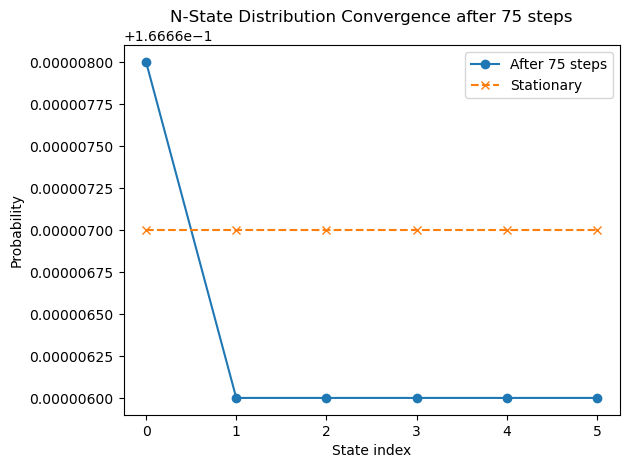

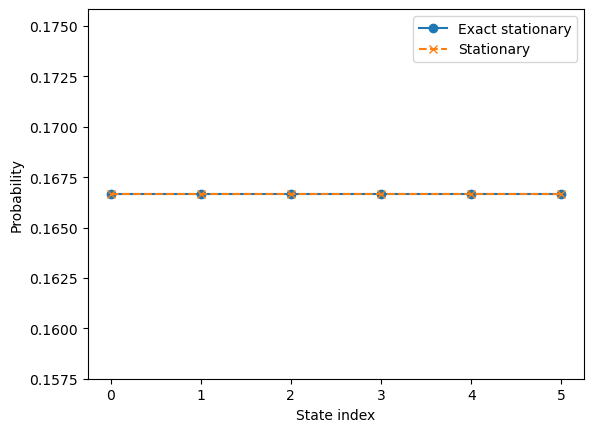

In [22]:
#N-STATE EXAMPLE
def n_state_demo(N, stay_prob, n_steps):
    """
    Demonstrates n-state Markov chain convergence for specified steps and parameters.

    arguments:
        N (int): Number of states.
        stay_prob (float): Stay probability for each state.
        n_steps (int): Number of steps to evolve the chain.

    returns:
        None: Prints stationary and final distributions, and displays convergence plots.
    """
    P_N = create_n_state_uniform_error_tpm(N, stay_prob)
    pi_N = compute_stationary_distribution_via_iteration(P_N)
    print("Stationary distribution (iteration):", pi_N)
    start_dist = [1.0] + [0.0] * (N - 1)
    dist_n = compute_n_step_distribution(P_N, start_dist, n_steps)
    print(f"Distribution after {n_steps} steps:", dist_n)

    r_dist = np.round(dist_n, 6)
    r_pi = np.round(pi_N, 6)

    plt.plot(range(N), r_dist, 'o-', label=f'After {n_steps} steps')
    plt.plot(range(N), r_pi, 'x--', label='Stationary')
    plt.title(f"N-State Distribution Convergence after {n_steps} steps")
    plt.xlabel("State index")
    plt.ylabel("Probability")
    plt.legend()
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    plt.figure()
    plt.plot(range(N), pi_N, 'o-', label='Exact stationary')
    plt.plot(range(N), pi_N, 'x--', label='Stationary')
    plt.xlabel("State index")
    plt.ylabel("Probability")
    plt.legend()
    plt.show()

# Example :
n_state_demo(N=6, stay_prob=0.86, n_steps=75)

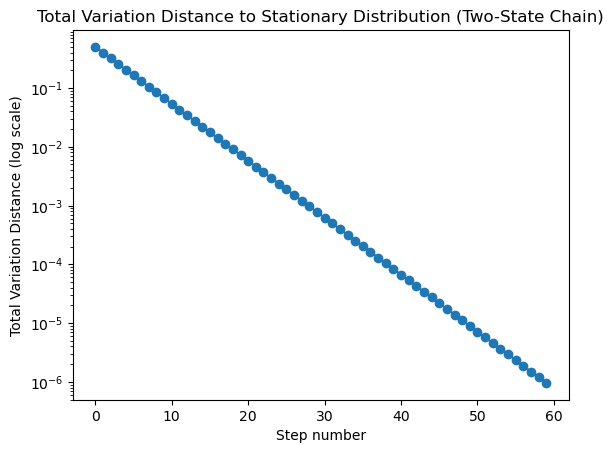

In [24]:
def total_variation_distance(dist1, dist2):
    """
    Computes total variation distance between two probability distributions.

    arguments:
        dist1 (list or np.ndarray): First probability distribution.
        dist2 (list or np.ndarray): Second probability distribution.

    returns:
        float: Total variation distance.
    """
    return 0.5 * np.sum(np.abs(np.array(dist1) - np.array(dist2)))

# Initial distribution (fully in state 0)
initial_distribution = [1.0, 0.0]

# Transition matrix with stay probability 0.9 for symmetric two state chain
transition_matrix = create_two_state_transition_matrix(0.9)

stationary_distribution = compute_stationary_distribution_via_iteration(transition_matrix)

total_variations = []
current_distribution = initial_distribution.copy()

# Iterate for 60 steps(it can take any value n), track total variation distance each step
for step in range(60):
    total_variations.append(total_variation_distance(current_distribution, stationary_distribution))
    current_distribution = compute_next_distribution(current_distribution, transition_matrix)

# Plot total variation distance on log scale to show convergence
plt.semilogy(total_variations, 'o-')
plt.title("Total Variation Distance to Stationary Distribution (Two-State Chain)")
plt.xlabel("Step number")
plt.ylabel("Total Variation Distance (log scale)")
plt.show()